In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/SuperAI/Project/GDA/images

# **Training**

# Convert YOLO 1.1 format to YOLO-OBB format

In [ ]:
import os

def convert_aabb_to_obb(aabb_labels_dirs, obb_labels_dirs):
    for aabb_labels_dir, obb_labels_dir in zip(aabb_labels_dirs, obb_labels_dirs):
        # Ensure the OBB directory exists
        os.makedirs(obb_labels_dir, exist_ok=True)

        for label_file in os.listdir(aabb_labels_dir):
            aabb_path = os.path.join(aabb_labels_dir, label_file)
            obb_path = os.path.join(obb_labels_dir, label_file)

            with open(aabb_path, 'r') as f:
                lines = f.readlines()

            with open(obb_path, 'w') as f:
                for line in lines:
                    class_id, x_center, y_center, width, height = map(float, line.split())
                    # Convert center, width, height to x1, y1, x2, y2, x3, y3, x4, y4
                    # Assuming no rotation, the OBB is the same as the AABB
                    x1 = x_center - width / 2
                    y1 = y_center - height / 2
                    x2 = x_center + width / 2
                    y2 = y_center - height / 2
                    x3 = x_center + width / 2
                    y3 = y_center + height / 2
                    x4 = x_center - width / 2
                    y4 = y_center + height / 2
                    # Write the converted annotation to the OBB label file with spaces
                    f.write(f"{int(class_id)} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}\n")

# Updated directory paths
aabb_labels_dirs = ['/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_labels_1', '/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_labels_2']
obb_labels_dirs = ['/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_1', '/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_2']

convert_aabb_to_obb(aabb_labels_dirs, obb_labels_dirs)


# Split dataset to train and val

In [ ]:
import os
import shutil
from random import shuffle
from sklearn.model_selection import train_test_split

def find_files(directories, extension=".jpg"):
    files = []
    for directory in directories:
        found_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]
        files.extend(found_files)
    return files

def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def copy_files(pairs, directory, label_directory):
    # Ensure target directories exist
    ensure_dir(directory)
    ensure_dir(label_directory)

    for img_path, label_path in pairs:
        img_name = os.path.basename(img_path)
        label_name = os.path.basename(label_path)

        shutil.copy2(img_path, os.path.join(directory, img_name))
        shutil.copy2(label_path, os.path.join(label_directory, label_name))
        print(f"Copied {img_path} to {os.path.join(directory, img_name)}")
        print(f"Copied {label_path} to {os.path.join(label_directory, label_name)}")

def split_data(images, labels, train_dir, val_dir, train_labels_dir, val_labels_dir, val_ratio=0.2):
    paired_data = list(zip(images, labels))
    train_pairs, val_pairs = train_test_split(paired_data, test_size=val_ratio, random_state=42)

    # Copy the files to train and validation directories
    copy_files(train_pairs, train_dir, train_labels_dir)
    copy_files(val_pairs, val_dir, val_labels_dir)

# Updated directory paths lists
source_images_paths = ['/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_images_1', '/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_images_2']
source_labels_paths = ['/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_1', '/content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_2']
train_directory_path = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train' #'/content/drive/MyDrive/SuperAI/Project/GDA/train/images'
val_directory_path = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val' #'/content/drive/MyDrive/SuperAI/Project/GDA/validation/images'
train_labels_directory_path = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/train' #'/content/drive/MyDrive/SuperAI/Project/GDA/train/labels'
val_labels_directory_path = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/val' #'/content/drive/MyDrive/SuperAI/Project/GDA/validation/labels'

# Find all image and label files
image_files = find_files(source_images_paths)
label_files = find_files(source_labels_paths, extension=".txt")

# Split and copy the images and labels to train and validation directories
split_data(image_files, label_files, train_directory_path, val_directory_path,
           train_labels_directory_path, val_labels_directory_path, val_ratio=0.2)


Copied /content/drive/MyDrive/SuperAI/Project/GDA/train_temp_images_1/0005.jpg to /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0005.jpg
Copied /content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_1/0108.txt to /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/train/0108.txt
Copied /content/drive/MyDrive/SuperAI/Project/GDA/train_temp_images_1/0122.jpg to /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0122.jpg
Copied /content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_1/0009.txt to /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/train/0009.txt
Copied /content/drive/MyDrive/SuperAI/Project/GDA/train_temp_images_2/20240315_182809.jpg to /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/20240315_182809.jpg
Copied /content/drive/MyDrive/SuperAI/Project/GDA/train_temp_OBBlabels_2/1710651084145.txt to /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/train/1710651084145.txt
Copied /content/drive

# write YAML file

In [ ]:
# Content to be written to the YAML file
yaml_content = """# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB # dataset root dir
train: /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train # train images (relative to 'path')
val: /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val # val images (relative to 'path')
#test: /content/drive/MyDrive/SuperAI/Project/GDA/test # test images (optional)

# Classes
names:
  0: Energy
  1: Sugar
  2: Fat
  3: Sodium
"""

# Write to the YAML file
with open('/content/drive/MyDrive/SuperAI/Project/GDA/GDA_yolo-obb.yaml', 'w') as file:
    file.write(yaml_content)

print('GDA_yolo-obb.yaml has been created.')


GDA_yolo-obb.yaml has been created.


# YOLO-OBB

In [3]:
# Install the ultralytics package from PyPI
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO

# Create a new YOLOv8n-OBB model from scratch
model = YOLO('yolov8l-obb.yaml') #YOLO('yolov8n-obb.yaml') # n, s, m, l

# # Train the model on the GDA_yolo-obb.yaml dataset
results = model.train(data='/content/drive/MyDrive/SuperAI/Project/GDA/GDA_yolo-obb.yaml', epochs=300, imgsz=800) #epochs=100, imgsz=640)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=obb, mode=train, model=yolov8l-obb.yaml, data=/content/drive/MyDrive/SuperAI/Project/GDA/GDA_yolo-obb.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

train: Scanning /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/train.cache... 99 images, 31 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0001.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0002.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0003.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0004.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0005.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0007.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0008.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train/0009.jpg: corrupt JPEG restored and saved
train: W


val: Scanning /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/labels/val.cache... 2 images, 31 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0018.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0021.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0025.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0040.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0056.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0065.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0069.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/val/0080.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/drive/MyDrive/S

Plotting labels to runs/obb/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs/obb/train5
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      16.8G      3.391       7.49       3.91          0        800: 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300        17G      3.788      4.578      4.164         14        800: 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.12it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      17.1G      2.998      4.114       3.69          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.57it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300        17G      2.643      3.842      3.685         11        800: 100%|██████████| 9/9 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.66it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      16.5G      2.656      3.513       3.51         27        800: 100%|██████████| 9/9 [00:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      16.5G      2.457      3.283      3.406         15        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      16.5G      2.377      3.303      3.255         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      16.5G      2.279      3.149      3.237         20        800: 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300        17G      2.132      2.937      3.193         16        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      16.5G      2.067      2.835      3.104         13        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      16.6G      2.025      2.835      3.014         15        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      16.6G      1.942      2.992      3.013         11        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      16.5G      1.882      2.782      2.879         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.98it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      16.5G      1.922      2.867      2.973          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.56it/s]

                   all         33          8          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      17.1G      1.903      2.852      2.929          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.37it/s]

                   all         33          8   0.000575      0.125   0.000587   0.000235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      17.1G      1.738      2.566      2.868         10        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         33          8    0.00482      0.125    0.00303   0.000574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      16.5G      1.767      2.412      2.849         17        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]

                   all         33          8   0.000489      0.125   0.000893   0.000179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      16.5G      1.817      2.394      2.893         13        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]

                   all         33          8   0.000489      0.125   0.000893   0.000179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      16.6G      1.889      2.396      2.844         14        800: 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.79it/s]

                   all         33          8   0.000489      0.125   0.000893   0.000179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      16.6G      1.726      2.385      2.817         17        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.96it/s]

                   all         33          8     0.0273       0.25     0.0287     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      16.5G      1.665      2.255      2.664          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.00it/s]

                   all         33          8     0.0139       0.25     0.0176     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      16.5G       1.63      2.133      2.552         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         33          8     0.0226       0.25     0.0159    0.00953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      16.6G      1.686      2.321      2.823         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         33          8     0.0196      0.375     0.0115    0.00919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      17.1G       1.65      2.212      2.673          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]

                   all         33          8      0.771      0.125      0.031     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300        17G      1.465      2.138      2.574          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.75it/s]

                   all         33          8     0.0297       0.25     0.0487      0.038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      16.6G      1.436      2.028      2.682         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]

                   all         33          8     0.0248       0.75     0.0483     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      16.6G      1.396      1.935      2.637          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]

                   all         33          8      0.284      0.125     0.0586     0.0439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      16.6G      1.442      2.155      2.541         16        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.73it/s]

                   all         33          8      0.319      0.125      0.221      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      16.5G      1.298      1.974       2.54          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.97it/s]

                   all         33          8     0.0495       0.75     0.0712     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      16.5G      1.295      1.809      2.636         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.45it/s]

                   all         33          8      0.303      0.125     0.0887     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      16.6G       1.22        1.8       2.62         15        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         33          8      0.602      0.125      0.158      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      16.6G      1.188      1.788      2.741         10        800: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]

                   all         33          8     0.0949      0.375     0.0917     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      16.5G      1.107      1.775      2.433          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.28it/s]

                   all         33          8      0.186      0.657       0.15      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      16.5G       1.19        1.7      2.617         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         33          8      0.556       0.25      0.187      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      16.6G       1.22      1.789      2.555         15        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]


                   all         33          8     0.0504      0.625     0.0944     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      16.6G      1.153      1.668      2.381          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         33          8     0.0359      0.875     0.0579     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      16.5G      1.152      1.675      2.474          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         33          8     0.0274        0.5      0.058     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      16.5G      1.052      1.636      2.488         16        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.25it/s]


                   all         33          8     0.0568        0.5     0.0999      0.077

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      16.6G      1.094      1.631      2.331         11        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.45it/s]

                   all         33          8     0.0453      0.625     0.0993       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      16.6G      1.032      1.563      2.544          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         33          8     0.0291      0.625     0.0434     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      16.5G      1.162      1.734      2.511          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]

                   all         33          8     0.0526      0.375     0.0529     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      16.6G      1.032      1.642      2.456          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.76it/s]

                   all         33          8     0.0282          1     0.0546     0.0491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      17.1G     0.9115       1.48      2.467          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all         33          8     0.0357      0.818     0.0706      0.059



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      16.6G      1.092      1.625      2.429         27        800: 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.96it/s]

                   all         33          8     0.0694        0.5      0.177      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      16.5G      1.047      1.558        2.4         19        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.65it/s]

                   all         33          8      0.105      0.375      0.137      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      16.5G      1.005      1.528      2.493         13        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.41it/s]

                   all         33          8     0.0595      0.375       0.14      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      16.6G     0.8517      1.474      2.455         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.37it/s]

                   all         33          8      0.541      0.375     0.0744     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      16.6G     0.9136      1.499      2.299         13        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.96it/s]

                   all         33          8     0.0371       0.75     0.0503     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      16.5G     0.8329      2.727      2.137          0        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.29it/s]

                   all         33          8     0.0821       0.75      0.132      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      16.5G      1.121      1.783      2.459          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.82it/s]

                   all         33          8      0.798      0.125      0.158      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      16.6G     0.9028      1.499      2.422          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]

                   all         33          8     0.0472      0.875     0.0961     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      16.6G     0.8313      1.435      2.326          7        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.46it/s]

                   all         33          8     0.0698        0.5      0.113      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      16.5G     0.8672      1.393      2.339          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.99it/s]

                   all         33          8     0.0476      0.875     0.0763     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      16.5G       0.79      1.378      2.253          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         33          8      0.326      0.375      0.121      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      17.1G     0.8385      1.492       2.46         11        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.70it/s]

                   all         33          8      0.313        0.5       0.12      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      17.1G     0.8651      1.426      2.405         16        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         33          8     0.0575      0.875      0.223      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      16.5G     0.7647      1.347      2.353          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.84it/s]

                   all         33          8     0.0684          1      0.117      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      16.6G     0.6877      3.572      2.075          0        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.74it/s]

                   all         33          8     0.0675       0.75      0.126      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      16.6G     0.7955      1.303      2.291         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.88it/s]

                   all         33          8     0.0492      0.625     0.0965     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      16.6G     0.6617      3.145      1.959          0        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.92it/s]

                   all         33          8     0.0427       0.75     0.0619     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      16.5G     0.7426      1.464      2.406         11        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]

                   all         33          8     0.0421      0.875      0.116      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      16.5G     0.7603      1.599      2.376          5        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.93it/s]

                   all         33          8     0.0958      0.375      0.279      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      16.6G     0.7184      1.393      2.363          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.17it/s]

                   all         33          8      0.302        0.5      0.151      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      16.6G      1.106      2.796      2.582          1        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]

                   all         33          8     0.0316      0.875     0.0736     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      16.5G     0.7869      1.402      2.294         16        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.47it/s]


                   all         33          8     0.0381      0.875     0.0646     0.0561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      16.6G     0.6259      5.331      2.056          0        800: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all         33          8     0.0589       0.25     0.0926     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      16.5G     0.7459      1.277      2.183         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.40it/s]

                   all         33          8     0.0651      0.463       0.14      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      16.6G      0.678      1.299      2.291         22        800: 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.31it/s]

                   all         33          8      0.474      0.625      0.347      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      16.5G     0.7343      1.268      2.226         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         33          8      0.119        0.5      0.284      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      16.6G     0.6406      1.221      2.359          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all         33          8      0.363       0.25      0.308      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      16.6G     0.6312      1.252      2.228         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.24it/s]

                   all         33          8      0.108        0.5      0.165      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      16.6G      0.803      1.493      2.239          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.82it/s]

                   all         33          8     0.0533      0.625      0.109      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      16.5G      0.707      1.213      2.254          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.55it/s]

                   all         33          8     0.0466       0.75     0.0796      0.073



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      16.5G     0.6195      1.165      2.186         15        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]


                   all         33          8     0.0563      0.875     0.0947     0.0905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      16.6G      1.027      1.835      2.293          6        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.42it/s]

                   all         33          8      0.127      0.376      0.199       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      16.6G     0.6589      1.156      2.358         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]

                   all         33          8      0.121       0.42      0.362      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      16.5G      0.613      6.011      1.927          0        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.36it/s]

                   all         33          8      0.105      0.875      0.256      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      16.5G     0.6869      1.103      2.247         19        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all         33          8       0.16      0.375      0.377      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      17.1G     0.7196      1.204      2.176          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all         33          8      0.469       0.25       0.36      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      17.1G     0.6594      1.259      2.341         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]

                   all         33          8     0.0671       0.75      0.107        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      16.5G     0.6632      1.156      2.159         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         33          8     0.0929        0.5      0.158      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      16.6G     0.7388      1.206      2.331          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         33          8     0.0928        0.5      0.311      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      16.6G     0.8143      1.237      2.235          5        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]

                   all         33          8      0.101      0.875      0.149      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      16.6G     0.6708      1.081      2.312          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.05it/s]

                   all         33          8     0.0664      0.875      0.169      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      16.5G     0.6204      1.094      2.158          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]

                   all         33          8     0.0435      0.875     0.0969      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      16.5G     0.6689      1.085      2.373          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all         33          8      0.562       0.25      0.202      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      16.6G     0.6787      1.048      2.153         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.37it/s]

                   all         33          8      0.608      0.375      0.218      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      16.6G     0.6643      1.073      2.153         25        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.86it/s]

                   all         33          8     0.0816      0.949      0.241      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      16.5G     0.6283      1.041      2.197          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.80it/s]

                   all         33          8     0.0924      0.375      0.212      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      16.5G     0.6146     0.9866       2.13         10        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.14it/s]

                   all         33          8      0.401      0.244      0.174      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      16.6G     0.6459      1.117      2.259          5        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.54it/s]

                   all         33          8       0.34       0.25      0.255      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      16.6G      0.705      1.025      2.372          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.51it/s]

                   all         33          8      0.123        0.5      0.184      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300        17G     0.6529      1.019      2.212          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         33          8      0.132      0.375       0.25      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300        17G     0.6402     0.9984      2.209         20        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]

                   all         33          8     0.0554          1        0.1     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      16.6G     0.6525      1.039      2.111         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.90it/s]

                   all         33          8     0.0647       0.75      0.116      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      16.6G     0.6564      1.122      2.235          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         33          8     0.0888       0.75      0.334      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      16.5G      0.641       1.01      2.161          5        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]

                   all         33          8      0.114      0.706      0.178      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      16.5G     0.6727     0.9844       2.27          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.87it/s]

                   all         33          8      0.117      0.375      0.225      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      16.6G      0.621     0.9326      2.353         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all         33          8     0.0936        0.5      0.147      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      16.6G     0.6742      1.013      2.257          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]

                   all         33          8       0.11       0.75      0.198      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      16.5G     0.7083      1.002      2.218         10        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.23it/s]

                   all         33          8       0.13      0.516      0.363      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      16.5G     0.6632      0.951      2.246          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.97it/s]

                   all         33          8        0.4       0.25       0.36      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      16.6G      0.659     0.9463      2.365         10        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all         33          8      0.109          1      0.356      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      16.6G      0.673      1.223      2.304          3        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.82it/s]

                   all         33          8      0.556      0.375      0.212      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      16.5G     0.5774     0.9559      2.407          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]

                   all         33          8       0.11       0.75      0.287      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      16.6G     0.6376     0.9651      2.174         15        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.38it/s]

                   all         33          8      0.189      0.687      0.366      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      16.6G     0.5877     0.8814      2.093         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.15it/s]

                   all         33          8      0.141      0.776       0.32      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      16.6G      0.595      0.841       2.15         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]

                   all         33          8     0.0803      0.749       0.13      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      16.5G     0.5965     0.8997      2.179         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all         33          8      0.296      0.375     0.0918     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      16.5G     0.5474     0.8785      2.139         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.80it/s]

                   all         33          8     0.0579       0.75       0.14      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      16.6G     0.6618     0.9592      2.143          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]

                   all         33          8      0.058      0.875      0.111      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      16.6G     0.6091     0.9664      2.206         11        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.55it/s]

                   all         33          8      0.372      0.375      0.287      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      16.5G     0.5637     0.9662      2.104          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.34it/s]

                   all         33          8     0.0898      0.625      0.175      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      16.6G     0.5978     0.8982      2.212          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         33          8      0.365      0.625      0.159      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      16.6G     0.6179     0.8732      2.215          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]

                   all         33          8       0.38      0.625      0.148      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      16.6G     0.5747     0.9158      2.144          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all         33          8     0.0817          1      0.138      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      16.5G     0.6413     0.8536      2.209          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         33          8      0.395      0.375      0.217      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      16.6G     0.6312     0.9257       2.11         17        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all         33          8     0.0893          1      0.194       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      16.6G     0.5669     0.8491      2.303         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.34it/s]

                   all         33          8     0.0986      0.959      0.207      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      16.6G     0.6066     0.8687      2.112          9        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.35it/s]

                   all         33          8      0.352      0.683      0.404      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      16.5G      0.565     0.9355      2.172         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.06it/s]

                   all         33          8      0.121      0.625      0.332      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      16.5G     0.6196     0.9053      2.218          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]

                   all         33          8       0.35       0.75      0.292       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      16.6G     0.6174     0.9309      2.252          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]

                   all         33          8     0.0763          1      0.236      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      16.6G     0.5472      0.894      2.148          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

                   all         33          8     0.0961      0.875      0.277      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      16.5G     0.5294      3.611      1.944          0        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.61it/s]

                   all         33          8      0.105      0.875       0.21       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      16.5G     0.6276     0.9082        2.3          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.00it/s]

                   all         33          8      0.328       0.75      0.175      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      16.6G     0.5176     0.9385      2.169          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.09it/s]

                   all         33          8     0.0843          1      0.147      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      16.6G     0.5641      1.002      2.212         14        800: 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         33          8     0.0572      0.875      0.114       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      16.5G     0.5822     0.9293      2.329          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]

                   all         33          8      0.092       0.75      0.155      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      16.5G     0.5267     0.9513      2.183          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         33          8     0.0642      0.625       0.16      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      16.6G     0.5335     0.8186      2.192         10        800: 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.57it/s]

                   all         33          8     0.0756          1      0.119      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      16.6G     0.5663     0.8508      2.255          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         33          8     0.0828          1      0.158       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300        17G     0.5116     0.7768      2.097         25        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         33          8      0.117      0.625      0.158      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      16.6G     0.5813     0.9027      2.265          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.22it/s]

                   all         33          8     0.0902       0.75      0.115      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      16.6G      0.625      0.958      2.314          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]

                   all         33          8     0.0839          1      0.126      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      16.6G       1.03      3.635       2.54          1        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.36it/s]

                   all         33          8     0.0838      0.875      0.178      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      16.5G     0.7454      1.601      2.384          1        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.86it/s]

                   all         33          8     0.0787      0.625      0.139      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      16.6G     0.4946     0.8288      2.177          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.10it/s]

                   all         33          8      0.087      0.625      0.206      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      16.6G     0.5248     0.7671      2.114         13        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         33          8       0.11       0.84      0.147      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      16.6G      0.531     0.7639      2.189         11        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]

                   all         33          8     0.0703          1      0.144      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      16.5G     0.5773     0.9645      2.137          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         33          8      0.301      0.375      0.136      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      16.6G     0.5143     0.8134       2.37          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]


                   all         33          8     0.0734       0.75       0.13      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      16.6G     0.5019     0.7794      2.121          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.14it/s]

                   all         33          8     0.0841          1       0.12      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      16.6G     0.5386     0.7798      2.254          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.16it/s]


                   all         33          8      0.105          1      0.147      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300        17G      0.498     0.8006      2.196          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.27it/s]

                   all         33          8      0.105      0.841      0.154      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      16.5G     0.5155      0.747      2.294          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.83it/s]


                   all         33          8     0.0678          1      0.114      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      16.6G     0.5487     0.7593      2.118         22        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         33          8     0.0795      0.812      0.102     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      16.6G      0.504     0.7703      2.071          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.94it/s]

                   all         33          8     0.0721      0.875      0.135      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      16.5G     0.5416     0.7957      2.038         14        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.01it/s]

                   all         33          8      0.108      0.875      0.155      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      16.6G     0.4892     0.7556      2.163          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.30it/s]

                   all         33          8     0.0924          1      0.151      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      16.6G     0.4838     0.7515      2.076         16        800: 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         33          8     0.0895          1       0.15      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      17.1G     0.4733     0.7234      2.223          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.51it/s]

                   all         33          8     0.0811          1      0.124      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      16.5G     0.4863     0.6732      2.185          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.63it/s]

                   all         33          8     0.0614          1      0.136      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      16.5G     0.4573     0.7106      2.215         16        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.09it/s]

                   all         33          8     0.0578       0.75      0.111       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      16.6G     0.5092     0.7266      2.084         18        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         33          8     0.0653          1       0.11      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      16.6G     0.5257     0.7939      2.001         27        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.94it/s]

                   all         33          8     0.0711          1      0.131      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      16.5G     0.5096     0.7723      2.058         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.98it/s]

                   all         33          8     0.0551          1     0.0959     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      16.6G     0.5119     0.7683      2.144          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]

                   all         33          8     0.0596          1     0.0973     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      16.6G     0.4897     0.7158      2.125         16        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.74it/s]

                   all         33          8     0.0522      0.875      0.123      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      16.6G     0.4968     0.6799      2.172         11        800: 100%|██████████| 9/9 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.44it/s]

                   all         33          8     0.0509       0.75       0.11      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      16.5G     0.4922     0.7575       2.13          5        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         33          8     0.0679       0.75      0.107      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      16.5G     0.4926     0.8738      2.188          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.08it/s]


                   all         33          8      0.173      0.625      0.211      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      16.6G     0.4863     0.7501      2.015          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.71it/s]

                   all         33          8      0.112      0.375      0.166      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      16.6G     0.5166     0.6977       2.08          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.70it/s]

                   all         33          8     0.0831          1      0.106      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      16.5G      0.511     0.7595      2.077          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all         33          8     0.0767      0.875      0.119      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      16.5G     0.4556     0.7904      2.008          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.78it/s]

                   all         33          8     0.0779          1      0.133      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      16.6G     0.5226     0.9713        2.1          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         33          8     0.0672      0.875      0.101      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      16.6G       0.58     0.8689      2.054         14        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.07it/s]

                   all         33          8       0.11       0.75      0.122      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      16.5G     0.5019      0.882      2.125          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         33          8     0.0701      0.875      0.132      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      16.5G     0.5008      0.685      2.184          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]

                   all         33          8     0.0878      0.958      0.143      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      16.6G     0.4947     0.7684      2.023         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.62it/s]

                   all         33          8     0.0818          1      0.146      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      16.6G     0.4949     0.7654      2.104          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]

                   all         33          8      0.116      0.625      0.135      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      16.5G     0.4704     0.8299      2.054         11        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.70it/s]

                   all         33          8     0.0994      0.875      0.131      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      16.5G     0.5036     0.7826      2.143          5        800: 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]

                   all         33          8      0.102      0.875      0.149      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      16.6G     0.4461     0.7024      2.035         11        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]

                   all         33          8     0.0799          1      0.145      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      16.6G     0.5228     0.7703      2.142          9        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]

                   all         33          8      0.083          1      0.147      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      16.5G      0.427      1.417      1.837          0        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.06it/s]


                   all         33          8      0.116      0.875      0.156      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      16.5G     0.4885     0.8221       2.17          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.88it/s]

                   all         33          8     0.0976       0.75      0.138      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      16.6G     0.5105     0.7085      2.025          8        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.87it/s]

                   all         33          8     0.0697          1      0.104      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      16.6G      0.486      0.668      2.169          7        800: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         33          8     0.0847      0.625      0.124      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      16.5G     0.4365     0.5949      2.056         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]


                   all         33          8     0.0916       0.75      0.161      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      16.5G     0.5057     0.7515      2.119         18        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.50it/s]

                   all         33          8       0.12      0.835       0.17      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      16.6G     0.4677     0.6627      2.061         12        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.37it/s]

                   all         33          8      0.129      0.856      0.195      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      16.6G     0.4675     0.8165      1.962          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.25it/s]

                   all         33          8     0.0969          1      0.271      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      16.5G     0.5424      0.678      2.164         16        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]

                   all         33          8     0.0913      0.817      0.146      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      16.5G     0.5088       0.82      1.947          3        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]

                   all         33          8     0.0995      0.875      0.137      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      16.6G     0.5137     0.6855      2.105         20        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.13it/s]

                   all         33          8     0.0985      0.915      0.169      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      16.6G     0.4237     0.6483      2.009         11        800: 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.60it/s]

                   all         33          8      0.124      0.625      0.155      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      16.5G     0.4832     0.6353      2.033          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]

                   all         33          8      0.127       0.75      0.199       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      16.5G     0.4817      0.659      2.139          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.56it/s]

                   all         33          8     0.0803      0.875      0.154       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      16.6G     0.4531     0.6717       2.21          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.85it/s]

                   all         33          8     0.0973          1      0.134      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      16.6G     0.4443     0.6086          2         16        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.23it/s]

                   all         33          8     0.0913          1      0.129      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      16.5G     0.4868     0.6332      2.291          4        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.79it/s]

                   all         33          8     0.0872       0.75      0.133      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      16.5G     0.4122      0.576      2.065         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.03it/s]

                   all         33          8     0.0914      0.845       0.12      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      17.1G      0.431     0.6099      2.049          5        800: 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.51it/s]

                   all         33          8     0.0839          1      0.109      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      17.1G     0.4533     0.6438      2.003         10        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all         33          8     0.0961      0.625      0.152      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      16.5G     0.4302     0.6008      2.088          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.41it/s]

                   all         33          8     0.0987       0.75      0.188      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      16.6G     0.4127     0.6525      2.218          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]

                   all         33          8     0.0869          1      0.133      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      16.6G     0.4618     0.5985      1.946         14        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]


                   all         33          8     0.0715          1     0.0924     0.0905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      16.6G     0.4394     0.6055      2.063         32        800: 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.81it/s]

                   all         33          8     0.0725      0.993     0.0956     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      16.5G     0.4523     0.5615      2.011          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]

                   all         33          8     0.0937      0.875      0.147      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      16.5G      0.429     0.6996      2.129          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.53it/s]

                   all         33          8     0.0857      0.875      0.171      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      16.6G     0.4783     0.6487      2.056          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]

                   all         33          8     0.0708          1      0.131      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      16.6G      0.444     0.6255      2.026         12        800: 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all         33          8     0.0788          1      0.101      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      16.5G     0.4085     0.6054      2.152          7        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.27it/s]

                   all         33          8      0.147          1      0.239      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      16.5G     0.4412     0.5948      1.999          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.98it/s]

                   all         33          8       0.14          1      0.243      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      17.1G     0.4451     0.7211       2.11          6        800: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         33          8      0.112      0.857      0.207      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      17.1G     0.4163     0.5523      2.045          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         33          8     0.0825          1      0.141      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      16.5G     0.4501     0.6183      2.042         10        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all         33          8     0.0785          1      0.162      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      16.5G     0.4126     0.5486      2.261          4        800: 100%|██████████| 9/9 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.69it/s]

                   all         33          8     0.0768          1      0.168      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      16.6G     0.4512     0.6234      2.063          9        800: 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]

                   all         33          8     0.0876        0.5       0.16       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      16.6G     0.4569     0.5885      2.106          6        800: 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.47it/s]

                   all         33          8     0.0691        0.5      0.141      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      16.5G     0.4185     0.5818      2.037          5        800: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.12it/s]

                   all         33          8     0.0853      0.875      0.197      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      16.5G     0.4644      0.623      1.957         32        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all         33          8      0.102          1      0.179      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      16.6G     0.4408     0.5519      2.017          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.14it/s]

                   all         33          8     0.0974       0.75      0.166      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      16.6G     0.5737     0.7561      2.337          5        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.07it/s]

                   all         33          8     0.0771          1      0.109      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      16.5G     0.4518      0.746       1.92         11        800: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.84it/s]

                   all         33          8     0.0672      0.875      0.125      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      16.5G     0.4128     0.5888      2.068          8        800: 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all         33          8     0.0593          1      0.141      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      16.6G     0.3942     0.5695      2.026         24        800: 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.42it/s]

                   all         33          8      0.108        0.5      0.168      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      16.6G     0.4407     0.6009      1.999         14        800: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.02it/s]

                   all         33          8     0.0682          1      0.153      0.152
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 120, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



220 epochs completed in 0.320 hours.
Optimizer stripped from runs/obb/train5/weights/last.pt, 89.4MB
Optimizer stripped from runs/obb/train5/weights/best.pt, 89.4MB

Validating runs/obb/train5/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-obb summary (fused): 287 layers, 44458143 parameters, 0 gradients, 168.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.19it/s]


                   all         33          8      0.351      0.683      0.404      0.394
                Energy         33          2      0.166          1      0.199      0.179
                 Sugar         33          2      0.113          1      0.662      0.662
                   Fat         33          2      0.126      0.733      0.578      0.578
                Sodium         33          2          1          0      0.176      0.159
Speed: 0.2ms preprocess, 7.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/obb/train5


In [ ]:
!cp -r /content/runs/obb/train5 /content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/train5

๒

---

# **Testing**

In [ ]:
# !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
from ultralytics import YOLO

# Load the trained model
# model = YOLO('/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/train/weights/best.pt')
model = YOLO('/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/train_ep-300_sz-800/weights/best.pt')


In [21]:
# Perform inference on an image or a directory of images
results = model.predict('/content/drive/MyDrive/SuperAI/Project/GDA/test')
# results = model.predict('/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/images/train')


image 1/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0006.jpg: 608x800 17.1ms
image 2/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0012.jpg: 800x608 14.8ms
image 3/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0013.jpg: 800x608 (no detections), 14.2ms
image 4/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0014.jpg: 608x800 15.9ms
image 5/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0019.jpg: 800x608 14.5ms
image 6/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0027.jpg: 800x608 (no detections), 14.2ms
image 7/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0028.jpg: 800x608 (no detections), 14.0ms
image 8/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0033.jpg: 800x608 (no detections), 13.7ms
image 9/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0035.jpg: 800x608 16.7ms
image 10/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0039.jpg: 800x608 14.0ms
image 11/48 /content/drive/MyDrive/SuperAI/Project/GDA/test/0041.jpg: 800x608 13.8ms
image

# Crops and draw OBB

###  plot only one oriented bounding box (OBB) per class

In [22]:
import cv2
import numpy as np
import os

def save_crops_and_draw_obb(result, save_dir, crops_dir):
    os.makedirs(save_dir, exist_ok=True)
    os.makedirs(crops_dir, exist_ok=True)

    colors = {0: (0, 0, 255),    # Red
              1: (255, 255, 100), # Blue
              2: (0, 255, 255),  # Green
              3: (147, 100, 200)}  # Pink

    orig_image_for_cropping = result.orig_img.copy()
    image_for_drawing = result.orig_img.copy()

    drawn_classes = set()  # Track drawn classes to ensure only one OBB per class

    if result.obb.xyxyxyxy.numel() > 0:
        obbs = result.obb.xyxyxyxy.cpu().numpy()
        aabbs = result.obb.xyxy.cpu().numpy()
        classes = result.obb.cls.cpu().numpy()
        confidences = result.obb.conf.cpu().numpy()

        original_basename = os.path.splitext(os.path.basename(result.path))[0]

        for i, (obb, aabb, cls_id, conf) in enumerate(zip(obbs, aabbs, classes, confidences)):
            if conf >= 0.2 and cls_id not in drawn_classes:
                # Mark the class as drawn
                drawn_classes.add(cls_id)

                crop_filename = f"{original_basename}_class_{cls_id}_crop_{i}.jpg"
                crop_path = os.path.join(crops_dir, crop_filename)
                x1, y1, x2, y2 = map(int, aabb)

                if x1 < x2 and y1 < y2 and x1 >= 0 and y1 >= 0 and x2 <= orig_image_for_cropping.shape[1] and y2 <= orig_image_for_cropping.shape[0]:
                    crop = orig_image_for_cropping[y1:y2, x1:x2]
                    if crop.size > 0:
                        cv2.imwrite(crop_path, crop)
                    else:
                        print(f"Empty crop detected for image {crop_filename}, skipping.")
                else:
                    print(f"Invalid crop coordinates for image {crop_filename}, skipping.")

                color = colors.get(cls_id, (255, 255, 255))
                print(f"Image: {crop_filename}, Class: {cls_id}, Confidence: {conf:.2f}")
                points = obb.reshape((-1, 1, 2)).astype(np.int32)
                cv2.polylines(image_for_drawing, [points], isClosed=True, color=color, thickness=10)
            elif conf >= 0.2:
                print(f"Class {cls_id} already drawn, skipping additional OBB.")
            else:
                print(f"Confidence is {conf:.2f} (Class {cls_id}), skipping additional OBB.")


    save_path = os.path.join(save_dir, os.path.basename(result.path))
    cv2.imwrite(save_path, image_for_drawing)


# Assuming `results` is defined and contains the results you want to process
save_dir = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/test-obb_results'
crops_dir = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/test-crops'
# save_dir = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/train-obb_results'
# crops_dir = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/train-crops'

for result in results:
    save_crops_and_draw_obb(result, save_dir, crops_dir)


Image: 0006_class_1.0_crop_0.jpg, Class: 1.0, Confidence: 0.86
Image: 0006_class_0.0_crop_1.jpg, Class: 0.0, Confidence: 0.86
Image: 0006_class_2.0_crop_2.jpg, Class: 2.0, Confidence: 0.86
Image: 0006_class_3.0_crop_3.jpg, Class: 3.0, Confidence: 0.69
Image: 0012_class_2.0_crop_0.jpg, Class: 2.0, Confidence: 0.50
Class 2.0 already drawn, skipping additional OBB.
Image: 0012_class_0.0_crop_2.jpg, Class: 0.0, Confidence: 0.37
Image: 0012_class_3.0_crop_3.jpg, Class: 3.0, Confidence: 0.35
Image: 0012_class_1.0_crop_4.jpg, Class: 1.0, Confidence: 0.30
Class 3.0 already drawn, skipping additional OBB.
Image: 0014_class_1.0_crop_0.jpg, Class: 1.0, Confidence: 0.87
Image: 0014_class_2.0_crop_1.jpg, Class: 2.0, Confidence: 0.81
Image: 0014_class_0.0_crop_2.jpg, Class: 0.0, Confidence: 0.78
Image: 0014_class_3.0_crop_3.jpg, Class: 3.0, Confidence: 0.53
Image: 0019_class_1.0_crop_0.jpg, Class: 1.0, Confidence: 0.83
Image: 0019_class_3.0_crop_1.jpg, Class: 3.0, Confidence: 0.70
Image: 0019_class_

------

# Preprocessing before OCR

## import cropped images

In [23]:
import cv2
import os

def load_cropped_images(crops_dir):
    """
    Loads all cropped images from a specified directory.

    Parameters:
    - crops_dir: Directory where the cropped images are saved.

    Returns:
    - A list of tuples, each containing the filename and the corresponding loaded image.
    """
    cropped_images = []
    for filename in os.listdir(crops_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image files
            file_path = os.path.join(crops_dir, filename)
            image = cv2.imread(file_path)
            if image is not None:
                cropped_images.append((filename, image))
            else:
                print(f"Warning: Could not load image {filename}")
    return cropped_images

Displaying 0058_class_2.0_crop_2.jpg


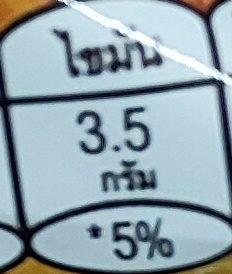

In [63]:
from google.colab.patches import cv2_imshow

# Specify the directory where your cropped images are saved
crops_dir = '/content/drive/MyDrive/SuperAI/Project/GDA/GDA-OBB/18032024/yolov8l-obb/train-crops'

# Load the cropped images
cropped_images = load_cropped_images(crops_dir)

# Assuming 'cropped_images' contains your loaded images as before
if cropped_images:
    filename, image = cropped_images[80]
    print(f"Displaying {filename}")
    cv2_imshow(image)  # Use cv2_imshow instead of cv2.imshow in Colab
else:
    print("No cropped images were loaded.")

In [25]:
len(cropped_images)

506

## Rotate/Skew

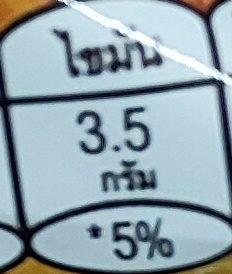

In [59]:
filename, img = cropped_images[80]
cv2_imshow(img)

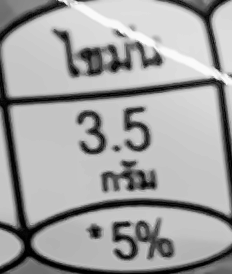

In [60]:
# grayscale
def img2gray(img):
    img = cv2.fastNlMeansDenoisingColored(img, None, 5, 5, 7, 21)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

gray = img2gray(img)
cv2_imshow(gray)

In [61]:
text = img2text(gray)
text

'ไชมัน 3.5 กรม 5%'

---

# OCR part

In [38]:
! pip install -q pytesseract
! apt install -qq tesseract-ocr tesseract-ocr-tha

The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-tha
0 upgraded, 4 newly installed, 0 to remove and 38 not upgraded.
Need to get 5,715 kB of archives.
After this operation, 16.7 MB of additional disk space will be used.
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr-osd.
Preparing to unpack .../tesseract-ocr-osd_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr.
Preparing to unpack .../tesseract-ocr_4.1.1-2.1build1_amd64.deb ...
Unpacking tesseract-ocr (4.1.1-2

In [44]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 37.1 MB/s eta 0:00:00


In [ ]:
import pytesseract
import easyocr

In [62]:
def img2text(img):
    # text = pytesseract.image_to_string(img, lang='tha', config='--oem 3 --psm 6')
    reader = easyocr.Reader(['th'])
    text_list = reader.readtext(img)
    text = ' '.join([result[1] for result in text_list]) # Extract text from each result tuple and join them into a single string
    return text

text = img2text(gray)
text

'ไชมัน 3.5 กรม 5%'